# FIT5201: Assessment 1
## The Elements of Machine Learning

### Objectives
This assignment consists of three parts (A,B,C) that assess your understanding of model complexity, model selection, uncertainty in prediction with bootstrapping, and probabilistic machine learning. The total marks of this assessment is 100, and will contribute to the 20% of your final score. 

## Important Note
* You can complete your assignment using the codes shared in the unit as a base. However, <font color='red'>**you should make sure the codes you are borrowing are correct and relevant to the question**</font>.

* Please follow the structure of this template as much as you can.

* You can use the prepopulated codes cells or change them if you prefere. However, please do not change the name of the key variables, functions, and parameters eg `knn`, `num.fold`, `train.data`. It helps us to read and understand your submissiont more efficiently.

### Part A.  Model Complexity and Model Selection
In this part, you study the effect of model complexity on the training and testing errors.  You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity.

__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in the sence that it finds the K nearest neighbors and estimates the label of the given test point based on the labels of its nearest neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ labels. 

#### Question 1 [KNN Regressor] 
Q1-1) Implement the KNN regressor function:
                                     `knn(train.data, train.label, test.data, K=3)` 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (`K`). It should return the regressed values for the test data points. When choosing the neighbors, you can use the Euclidean distance function to measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

Q1-2) Plot the training and the testing errors versus `1/K` for `K=1,..,20` in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Discuss your findings.

Q1-3) Report the best value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in Q1-2. 

#### Question 2 [K-fold Cross Validation] 
Q2-1) Implement a K-fold Cross Validation (CV) function for your KNN regressor:  
       `cv(train.data, train.label, numFold=10)` 
which takes the training data and their labels (continuous values), the number of folds, and returns RMSE for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

Q2-2) Using the training data, run your K-fold CV where the `numFold` is set to 10. Change the value of `K=1,..,20` and for each K compute the average `10` RMSE values you have got.  Plot the average error numbers versus `1/K` for `K=1,..,20`. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Include the plot in your report. 

Q2-3) Report the values of K that results the minimum average RMSE and minimum standard deviation of RMSE based on your cross validation plot in Q2-2.  Discuss your findings.

## Question 1 [KNN Regressor] 

We load the R libraries required.

In [1]:
library(ggplot2) # For plotting
library(reshape2) # For ...
#...

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"

### Q1-1 Implement the KNN regressor

We define a function to calculate the mean value of the K nearest neighbours based on a distance matrix. And a function to calculate the root mean square error (RMSE).

In [2]:
knn <- function(train.data, train.label, test.data, K=3){
    
    # Pre-allocate vector and matrices if needed (optional)
    # eg. for the best performance, find the distance between any pair of test and train set...
    # and sort the index of train.data based on their distances to each test.data sample 
    
    # create variables
    train.len <- 0
    test.len <- 0
    all.data <- c()
    
    # check if we have 1 dimensional data
    if(is.null(nrow(train.data)) | is.null(ncol(train.data))){
        #print('Case A')
        # if so we need to do length() instead of nrow()
        
            ## count number of train samples
            train.len <- length(train.data)

            ## count number of test samples
            test.len <- length(test.data)
        
        # also need to do c() instead of rbind()
        
            # combine data
            all.data <- c(test.data, train.data)
        
    }# endif(<1dim data>)
    else {
        
        #print('Case B')
        ## count number of train samples
        train.len <- nrow(train.data)

        ## count number of test samples
        test.len <- nrow(test.data)
        
        # combine data
        all.data <- rbind(test.data, train.data)
        
    }#endelse (<1dim data>)
    

    
    mean.value <- rep(0,test.len)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(all.data, method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        
        
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        mean.value[i]<- (mean(train.label[nn]))
    }
    
    # Return the mean value as output
    return (mean.value)
    
}


rmse <- function(real.value, estimated.value) {
    
  return(sqrt(mean((real.value - estimated.value)^2)))
}

### Q1-2 Plot training and testing errors v.s. 1/K

We load the data, then separate the predictors (train.data and test.data) from the target values (train.value and test.value) for input to the knn regressor function.

In [3]:
# Load the data
train.data <- read.csv("../Task1A_train.csv")

In [4]:
dim(train.data)

[1] 42  2

In [5]:
head(train.data,3)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61


In [6]:
summary(train.data)

       x1             y         
 Min.   :1960   Min.   : 0.610  
 1st Qu.:1965   1st Qu.: 1.245  
 Median :1970   Median : 3.195  
 Mean   :1970   Mean   : 5.023  
 3rd Qu.:1975   3rd Qu.: 7.537  
 Max.   :1980   Max.   :16.200  

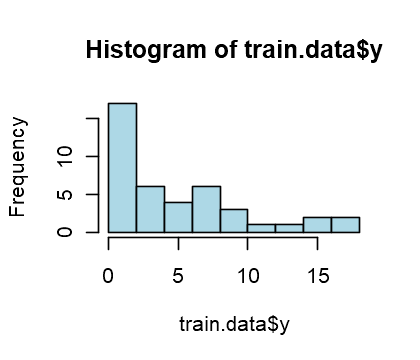

In [7]:
options(repr.plot.width=3.5, repr.plot.height=3.0)
hist(train.data$y, col = 'lightblue')

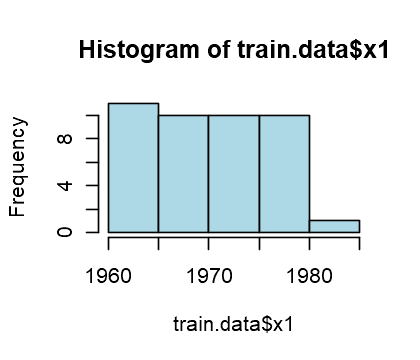

In [8]:
options(repr.plot.width=3.5, repr.plot.height=3.0)
hist(train.data$x1, col = 'lightblue')

In [9]:
test.data <- read.csv("../Task1A_test.csv")

In [10]:
dim(test.data)

[1] 42  2

In [11]:
head(test.data,3)

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69


In [12]:
summary(test.data)

       x1             y         
 Min.   :1960   Min.   : 0.440  
 1st Qu.:1965   1st Qu.: 1.262  
 Median :1970   Median : 3.510  
 Mean   :1970   Mean   : 4.577  
 3rd Qu.:1976   3rd Qu.: 6.728  
 Max.   :1981   Max.   :14.670  

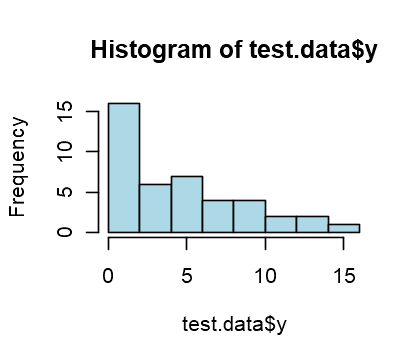

In [13]:
options(repr.plot.width=3.5, repr.plot.height=3.0)
hist(test.data$y, col = 'lightblue')

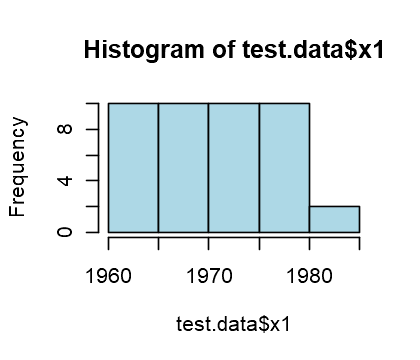

In [14]:
options(repr.plot.width=3.5, repr.plot.height=3.0)
hist(test.data$x1, col = 'lightblue')

__ Observations__

- Both train & test sets have same distributions for each variables.
- Probably good to scale both of them for knn but dont actually need since only one input variable

In [15]:
head(train.data,3)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61


So column 1 (x1) is our data and column 2 (y) is our label

In [16]:
# Split dependent and independent attributes
train.label <- train.data[,2] # label only
train.data <- train.data[,-2] # remove label

In [17]:
head(train.label,3)

[1] 0.71 0.85 0.61

In [18]:
head(train.data,3)

[1] 1960.0 1960.5 1961.0

In [19]:
test.label <- test.data[,2] # label only
test.data <- test.data[,-2] # remove label

In [20]:
## count number of train samples
train.len <- length(train.data)

## count number of test samples
test.len <- length(test.data)

# set random seed
set.seed(1234)

In [21]:
train.len
test.len

[1] 42

[1] 42

We calculate the train and test RMSE's for K in 1:20.

In [22]:
# Initiate a dataframe to recors RMSE
rmse.df <- data.frame('K'=1:20, 'TrainRMSE'=0, 'TestRMSE'=0)

In [23]:
head(rmse.df,3)

K,TrainRMSE,TestRMSE
1,0,0
2,0,0
3,0,0


In [24]:
# calculating rmse... 
for (k in 1:20) {
    
    # training rmse
    # knn <- function(train.data, train.label, test.data, K=3)
    rmse.df[k, 'TrainRMSE'] = rmse(train.label,knn(train.data,train.label,train.data,K=k))
    
    
    # testing rmse
    rmse.df[k, 'TestRMSE'] = rmse(test.label,knn(train.data,train.label,test.data,K=k))
    
    # NB first argument in each rmse() call is different, first is 'train.data', second is 'test.data'
    # NB third argument in each knn() call is different, first is 'train.data', second is 'test.data'
        
}

In [25]:
head(rmse.df,3)

K,TrainRMSE,TestRMSE
1,0.0000000,1.299894
2,0.3497031,1.458311
3,0.3103885,1.301972


In [26]:
tail(rmse.df,3)

,K,TrainRMSE,TestRMSE
18,18,1.945864,1.358559
19,19,2.058544,1.384632
20,20,2.147728,1.508961


We plot the training and testing errors.

In [27]:
# Reshape if needed
rmse.df.melted <- melt(rmse.df, id='K') # reshape for visualization
names(rmse.df.melted) <- c('K', 'type', 'RMSE')

In [28]:
head(rmse.df.melted,3)

K,type,RMSE
1,TrainRMSE,0.0000000
2,TrainRMSE,0.3497031
3,TrainRMSE,0.3103885


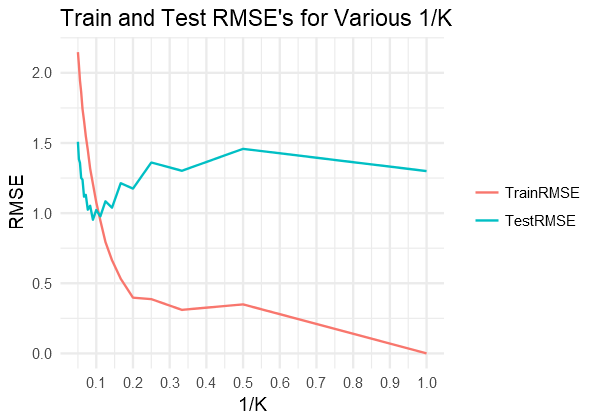

In [29]:
# Plot
options(repr.plot.width=5, repr.plot.height=3.5) 
ggplot(data=rmse.df.melted, aes(x=1/K, y=RMSE, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various 1/K")

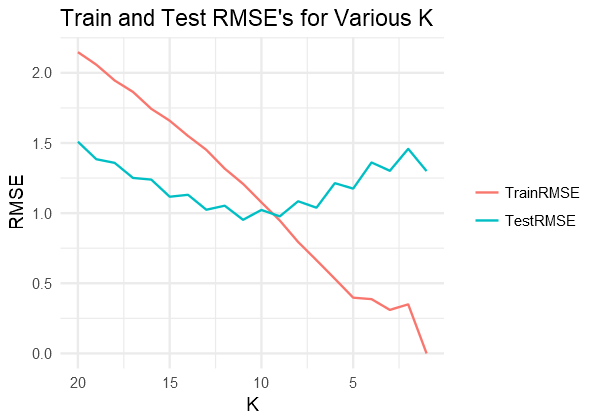

In [30]:
options(repr.plot.width=5, repr.plot.height=3.5) 
ggplot(data=rmse.df.melted, aes(x=K, y=RMSE, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       #scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various K") +
       scale_x_reverse()

### Q1-3 Report the best K

__ 1st Graph __ 

We see a clear U-shape for the test set in the 1/K complexity vs Error graph, with the minimum around 1/K = 0.1 

For values approx 1/K < 0.1, the test error increases, suggesting underfitting (ie complexity is too low)

For values approx 1/K > 0.1 the test error increases, suggesting overfitting (ie complexity is too high)

The train error approximately exponentially decreases towards 0 as complexity (1/K) increases.

__ 2nd Graph__

We still see the U-shape for the test set in the second graph, which still plots complexity vs error by plotting K on the x axis but then reversing the limits so K is descending rather than ascending. Hence we still capture the pattern of increasing complexity as K decreases, but on a different scale.

Visually the minimum test error appears to be around K = 10, which corresponds with the 1/K = 0.1 value observed in the first graph.

For values approx K > 10 the test error increases, suggesting underfitting (ie complexity is too low)

For values approx K < 10 the test error increases, suggesting overfitting (ie complexity is too high)

The training error graph here is more linear and less exponential but still heads to 0 as complexity increases (K decreases).

__ Best K Value__

So far we have two approximations based on the minimum test error in both graphs:

- 1/K approximately 0.1
- K approximately 10

The exact K value is:

In [31]:
# find the value for K which minimises the Test RMSE
which.min(rmse.df$TestRMSE)

[1] 11

So the best K value is 11.

## Question 2 [K-fold Cross Validation]

### Q2-1 Implement a K-fold cross validation

We define a function to segment a dataset into a given number of folds for K-fold cross validation to determine the most suitable value for the number of nearest neighbours K considering all the folds.

In [32]:
set.seed(1234)

In [33]:
# define a function that generates sample indixes based on bootstrap technique
cv.samples <- function (sample.size, num.fold){
    options(warn = -1)
    index.shuffle <- sample(x=sample.size, size=sample.size, replace = FALSE)
    
       dev.size <- floor(sample.size / num.fold)
    
    indx <- matrix(index.shuffle,nrow=num.fold, byrow = TRUE)
   # indx <- matrix(index.shuffle,ncol=dev.size, byrow = FALSE)
    
    return(indx)
    
}
# just to see if it works!
cv.samples(10, 3)

2,6,5,8
9,4,1,7
10,3,2,6


In [34]:
cv <- function (train.data, train.label, num.fold=10, K=3){
    # Initiate a dataframe to record RMSE
    
    L <- num.fold
    
    rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'RMSE'=rep(0, L * K))
    
    train.len <- length(train.data)
    
    dev.size = floor(train.len / L) # number of samples reserved for validation
    # notice that since the sample size may not be a multiple of 10!
    
    cv.samples.indx <- cv.samples(train.len, num.fold)
    
    for (l in 1:num.fold) {
        dev.indices = cv.samples.indx[l,] # indices for this fold only
        #train.indices =  # all indices except the ones used above for the fold
        
        
        # for each value of k...
        for (k in 1:K) {
            
            #### calculate iteration index i
            i <- (k-1)*L+l

            #### save the value of k and l
            rmse.df[i,'K'] <- k
            rmse.df[i,'L'] <- l

            # rmse (real, estimate)
            # knn <- function(train.data, train.label, test.data, K=3)
            rmse.df[i,'RMSE' ] = rmse(train.label[dev.indices],
                                      knn(train.data[-dev.indices],
                                          train.label[-dev.indices],
                                          train.data[dev.indices],
                                          K=k))
        }
    
    }
    
    return(rmse.df)
}

In [35]:
K <- 20 # maximum number of nearest neighbours
L <- 10 # number of folds in cross validation

In [36]:
c(train.data, test.data)

[1] 1960.00 1960.50 1961.00 1961.50 1962.00 1962.50 1963.00 1963.50 1964.00
[10] 1964.50 1965.00 1965.50 1966.00 1966.50 1967.00 1967.50 1968.00 1968.50
[19] 1969.00 1969.50 1970.00 1970.50 1971.00 1971.50 1972.00 1972.50 1973.00
[28] 1973.50 1974.00 1974.50 1975.00 1975.50 1976.00 1976.50 1977.00 1977.50
[37] 1978.00 1978.50 1979.00 1979.50 1980.00 1980.50 1960.25 1960.75 1961.25
[46] 1961.75 1962.25 1962.75 1963.25 1963.75 1964.25 1964.75 1965.25 1965.75
[55] 1966.25 1966.75 1967.25 1967.75 1968.25 1968.75 1969.25 1969.75 1970.25
[64] 1970.75 1971.25 1971.75 1972.25 1972.75 1973.25 1973.75 1974.25 1974.75
[73] 1975.25 1975.75 1976.25 1976.75 1977.25 1977.75 1978.25 1978.75 1979.25
[82] 1979.75 1980.25 1980.75

In [37]:
ncol(c(train.data, test.data))

NULL

In [38]:
# cv <- function (train.data, train.label, num.fold=10, K=3)
rmse.df <- cv(c(train.data, test.data), c(train.label, test.label), L,K)
# note that we combine train.data and test.data so that both are used for cross validation. Same with the labels/target variables

In [39]:
head(rmse.df,3)

K,L,RMSE
1,1,1.6912159
1,2,1.5424692
1,3,0.7696464


In [40]:
tail(rmse.df,3)

,K,L,RMSE
198,20,8,1.4146285
199,20,9,1.5370870
200,20,10,0.6096432


In [41]:
# create a pivot table to average all the rmse for all the folds (L values)
K.rmse.means <- dcast(rmse.df, K ~ 'meanRMSE' , value.var="RMSE", mean)

In [42]:
head(K.rmse.means,1)

K,meanRMSE
1,1.41794


In [43]:
# check/cofirm by manually finding the mean for K = 1
round(mean(rmse.df[rmse.df$K == 1,]$RMSE),7)

[1] 1.41794

They are identical.

Now repeat for standard deviation:

In [44]:
K.rmse.sds <- dcast(rmse.df, K ~ 'sdRMSE' , value.var="RMSE", sd)

In [45]:
head(K.rmse.sds,1)

K,sdRMSE
1,0.5251701


In [46]:
# check/cofirm by manually finding the sd for K = 1
round(sd(rmse.df[rmse.df$K == 1,]$RMSE),7)

[1] 0.5251701

In [47]:
rmse.plot.info <- cbind(K.rmse.means,K.rmse.sds$sdRMSE)
colnames(rmse.plot.info)[3] <- 'sdRMSE'

In [48]:
head(rmse.plot.info,3)

K,meanRMSE,sdRMSE
1,1.417940,0.5251701
2,1.303310,0.5371156
3,1.234485,0.4690900


### Q2-2 Plot RMSE v.s. 1/K

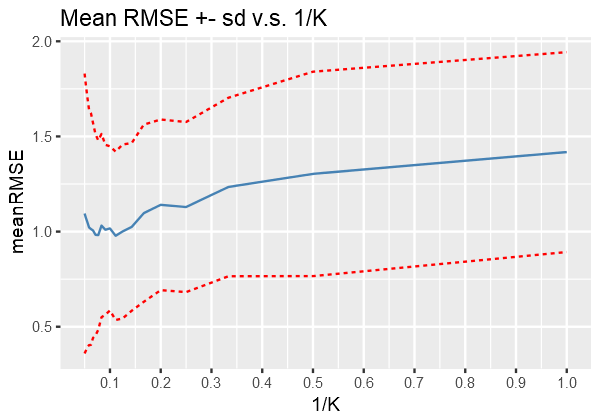

In [49]:
# Plot the RMSE vs 1/K

options(repr.plot.width=5, repr.plot.height=3.5) 
ggplot(data=rmse.plot.info, aes(x=1/K, y=meanRMSE)) + geom_line(colour = 'steelblue') +
       geom_line(data=rmse.plot.info, aes(x=1/K, y=meanRMSE+sdRMSE), linetype="dashed", colour = 'red') +
       geom_line(data=rmse.plot.info, aes(x=1/K, y=meanRMSE-sdRMSE), linetype="dashed", colour = 'red') +
     scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Mean RMSE +- sd v.s. 1/K")

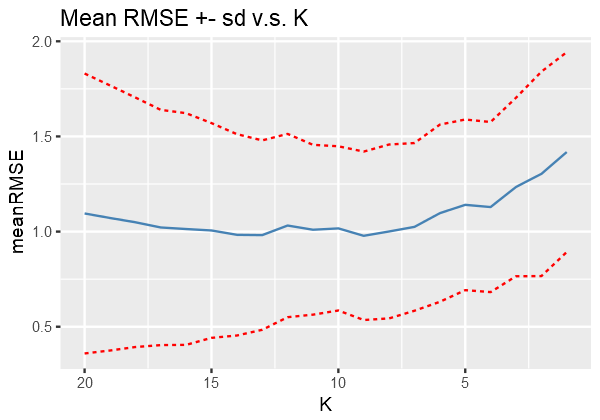

In [50]:
# Plot the RMSE vs 1/K

options(repr.plot.width=5, repr.plot.height=3.5) 
ggplot(data=rmse.plot.info, aes(x=K, y=meanRMSE)) + geom_line(colour = 'steelblue') +
       geom_line(data=rmse.plot.info, aes(x=K, y=meanRMSE+sdRMSE), linetype="dashed", colour = 'red') +
       geom_line(data=rmse.plot.info, aes(x=K, y=meanRMSE-sdRMSE), linetype="dashed", colour = 'red') +
       ggtitle("Mean RMSE +- sd v.s. K") +
    scale_x_reverse()

### Q2-3 Report the best K

The blue line in the 1st and 2nd graphs in Q2 represents the test error (not the training error) and is very similar to the test error line in the 1st and 2nd graphs of Q1:

__ 1st Graph RMSE (mean) __ 

We see a clear U-shape for the test set in the 1/K complexity vs Error graph, with the minimum around 1/K = 0.1 

For values approx 1/K < 0.1, the test error increases, suggesting underfitting (ie complexity is too low)

For values approx 1/K > 0.1 the test error increases, suggesting overfitting (ie complexity is too high)

__ 2nd Graph RMSE (mean)__

We still see the U-shape for the test set in the second graph, which still plots complexity vs error by plotting K on the x axis but then reversing the limits so K is descending rather than ascending. Hence we still capture the pattern of increasing complexity as K decreases, but on a different scale.

Visually the minimum test error appears to be around K = 10, which is basically the same as in Q1.

For values approx K > 10 the test error increases, suggesting underfitting (ie complexity is too low)

For values approx K < 10 the test error increases, suggesting overfitting (ie complexity is too high)

__ 1st Graph RMSE (st.error)__

The standard error of the RMSE appears to be wider for values far away from the minimum (approx K = 10 or 1/K = 0.1) whereas it is closer/smaller for values closer to K = 10. This suggests that the minimum value for the standard error of RMSE will be close to the value for the minimal RMSE mean, namely approx K = 10.

__ Best K Value (mean, st.error)__

In [51]:
head(rmse.plot.info,3)

K,meanRMSE,sdRMSE
1,1.417940,0.5251701
2,1.303310,0.5371156
3,1.234485,0.4690900


In [52]:
which.min(rmse.plot.info$meanRMSE)

[1] 9

In [53]:
which.min(rmse.plot.info$sdRMSE)

[1] 10

Hence the optimal K value for the minimum mean of the RMSE is K = 9, whereas the optimal K vaue for the minimum standard error of the RMSE is K = 10. We note that these are very similar, as observed visually, and we take K = 9 as the final value. This is very similar but slightly lower than the value of K = 11 obtained in Q1, suggesting that cross validation has found a slightly higher optimal model complexity.

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.  

Q3-3) Based on your plot in Q3-2, how does the test error and its uncertainty behave as `K` increases? 

Q3-4) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  

Q3-5) Based on your plot in Q3-4, how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

## Question 3 [Bootstrapping] 

### Q3-1 Implement KNN regression with bootstrapping

We define a function that randomly sample row indices with replacement from a given dataset.

In [54]:
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

We load the data, then separate the predictors from the target values for input to the knn regressor function.

In [55]:
# Load the datasets
train.data <- read.csv("../Task1B_train.csv")
dim(train.data)

[1] 930   5

In [56]:
head(train.data,3)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7


In [57]:
summary(train.data)

       x1             x2             x3             x4             y       
 Min.   :1991   Min.   :1402   Min.   :1596   Min.   :1611   Min.   :2285  
 1st Qu.:1993   1st Qu.:1744   1st Qu.:2162   1st Qu.:1874   1st Qu.:2841  
 Median :1995   Median :2139   Median :2795   Median :1989   Median :3247  
 Mean   :1995   Mean   :2529   Mean   :3374   Mean   :2227   Mean   :3564  
 3rd Qu.:1997   3rd Qu.:2720   3rd Qu.:3809   3rd Qu.:2273   3rd Qu.:3982  
 Max.   :1999   Max.   :6186   Max.   :8401   Max.   :4369   Max.   :6179  

In [58]:
test.data <- read.csv("../Task1B_test.csv")
dim(test.data)

[1] 930   5

In [59]:
head(test.data,3)

x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8


In [60]:
summary(test.data)

       x1             x2             x3             x4             y       
 Min.   :1992   Min.   :1421   Min.   :1587   Min.   :1612   Min.   :2281  
 1st Qu.:1993   1st Qu.:1745   1st Qu.:2167   1st Qu.:1876   1st Qu.:2846  
 Median :1995   Median :2142   Median :2799   Median :1996   Median :3246  
 Mean   :1995   Mean   :2532   Mean   :3379   Mean   :2229   Mean   :3567  
 3rd Qu.:1997   3rd Qu.:2729   3rd Qu.:3813   3rd Qu.:2272   3rd Qu.:3994  
 Max.   :1999   Max.   :6184   Max.   :8412   Max.   :4388   Max.   :6174  

__ Observations __

Both datasets have approximately the same range for each variable, however the range of each variable is different compared the other variables. The distance calculations in knn work better if the metric is calculated on variables with a range between (0,1) because it is quicker and it doesn't add weight to some variable's units over others.

Hence we Z-scale the train and test sets:

In [61]:
test.data <- scale(test.data)
train.data <- scale(train.data)

In [62]:
head(train.data,3)

x1,x2,x3,x4,y
-1.729259,-0.8314871,-1.020943,-0.7844105,-1.148323
-1.725536,-0.8520287,-1.020642,-0.8790979,-1.143610
-1.721813,-0.8412684,-1.015825,-0.8702858,-1.106215


The target variable is the 5th column

In [63]:
# Split dependent and independent attributes
train.label <- train.data[,5] # target var/label only
train.data <- train.data[,-5] # remove label

In [64]:
round(head(train.label,3),7)

[1] -1.148323 -1.143610 -1.106215

In [65]:
test.label <- test.data[,5]  # target var/label only
test.data <- test.data[,-5] # remove label

In [66]:
train.len <- nrow(train.data)
test.len <- nrow(test.data)

train.len
test.len

[1] 930

[1] 930

In [67]:
# set random seed
set.seed(1234)

Now we perform the bootstrapping

In [68]:
K <- 20             # Maximum K for KNN
L <- 100            # Number of bootstrapped samples
N <- 25             # Size of bootstrapped samples

In [69]:
# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'RMSE'=rep(0, L * K))

In [70]:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        rmse.df[i,'K'] <- k
        rmse.df[i,'L'] <- l
        
        rmse.df[i,'RMSE' ] <- rmse(test.label[indx],
                                      knn(train.data[indx,],
                                          train.label[indx],
                                          test.data[indx,],
                                          K=k))
    } 
}

In [71]:
head(rmse.df,3)

K,L,RMSE
1,1,0.02935134
1,2,0.02305615
1,3,0.02820240


In [72]:
tail(rmse.df,3)

,K,L,RMSE
1998,20,98,0.7754596
1999,20,99,0.5923568
2000,20,100,0.6838759


### Q3-2 Plot bootstrapping KNN regression for different number of nearest neighbours

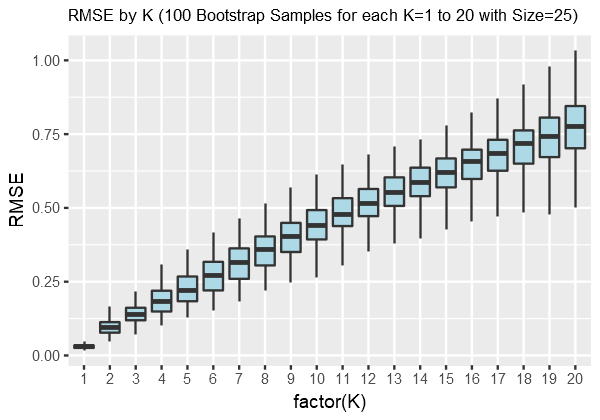

In [73]:
# Apply bootstrapping for KNN regression with 100 bootstrapped datasets, 
# each having 25 samples, and maximum number of neighbours 20
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data=rmse.df, aes(x=factor(K), RMSE)) + 
    geom_boxplot(outlier.shape = NA, fill = 'lightblue') + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    ggtitle('RMSE by K (100 Bootstrap Samples for each K=1 to 20 with Size=25)') +
    theme(plot.title = element_text(size = 10))

### Q3-3 Results interpretation

There is a clear linear trend/positive correlation between increasing K and increasing the median RMSE. This suggests that for this dataset, higher model complexity (low K values) are more accurate ie have lower errors.

Also, the uncertainty/spread in the error, denoted by the interquartile range and/or boxplot whiskers, clearly increases as K increases. We note that this is the same general pattern found in Q2, namely that as K approaches the value with minimum error, the uncertainty around the error also decreases.

### Q3-4 Plot bootstrapping KNN regression for different number of bootstrapped datasets

In [74]:
K <- 5                # k nearest neighbours
N <- 25                # Size of bootstrapped samples
max.sample.size = 200  # Maximum size of sampling
max.times <- 200 # max num times to sample by
times.sequence <- seq(from=10, to=max.times, by=10)

# A dataframe to track the RMSE of each case
rmse.df <- data.frame('Times'= times.sequence, L = 1:max.times, 'RMSE'=0)
#rmse.df <- data.frame('K'=1:K, 'L'=1:L, 'RMSE'=rep(0, L * K))

In [75]:
rmse.df <- merge(times.sequence,1:max.times, all = TRUE)

In [76]:
names(rmse.df) <- c('Times','L')

In [77]:
dim(rmse.df)

[1] 4000    2

In [78]:
head(rmse.df,3)

Times,L
10,1
20,1
30,1


In [79]:
rmse.df <- rmse.df[(rmse.df$Times >= rmse.df$L),]

In [80]:
rmse.df[rmse.df$Times == 10,]

,Times,L
1,10,1
21,10,2
41,10,3
61,10,4
81,10,5
101,10,6
121,10,7
141,10,8
161,10,9
181,10,10


In [81]:
tail(rmse.df[rmse.df$Times == 20,],5)

,Times,L
302,20,16
322,20,17
342,20,18
362,20,19
382,20,20


In [82]:
rmse.df['RMSE'] <- 0

In [83]:
head(rmse.df,3)

Times,L,RMSE
10,1,0
20,1,0
30,1,0


In [84]:
dim(rmse.df)

[1] 2100    3

In [85]:
rownames(rmse.df) <- NULL

In [86]:
tail(rmse.df,3)

,Times,L,RMSE
2098,200,198,0
2099,200,199,0
2100,200,200,0


In [87]:
i <- 0
for (L in times.sequence){



    #### save sample indices that were selected by bootstrap
    boot.indx <- boot(nrow(train.data), N, L)
    
    for(l in 1:L){
        
        #### calculate iteration index i
        i <- i+1
        
        indx <- boot.indx[l,]
        
        
    rmse.df[i,'RMSE' ] <- rmse(test.label[indx],
                                  knn(train.data[indx,],
                                      train.label[indx],
                                      test.data[indx,],
                                      K=K))
    }


} 


In [88]:
head(rmse.df,3)

Times,L,RMSE
10,1,0.2537323
20,1,0.2204474
30,1,0.2248708


In [89]:
tail(rmse.df,3)

,Times,L,RMSE
2098,200,198,0.1691974
2099,200,199,0.2058949
2100,200,200,0.1807869


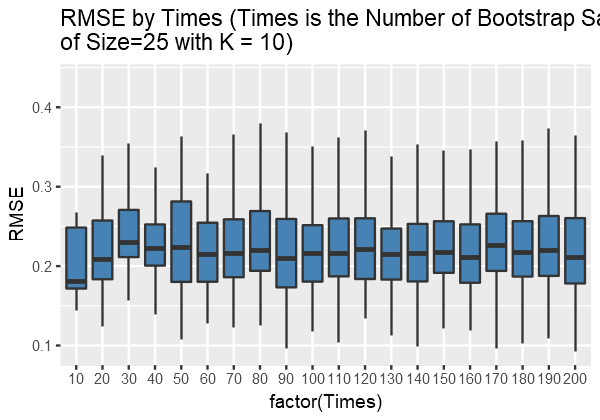

In [90]:
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data=rmse.df, aes(factor(Times), RMSE)) + 
    geom_boxplot(outlier.shape = NA, fill = 'steelblue') + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    ggtitle('RMSE by Times (Times is the Number of Bootstrap Samples\nof Size=25 with K = 10)')

### Q3-5 Results interpretation

We see that as the number of boostrapping samples/times increases, the median RMSE fluctuates less and approaches a near constant value. Also the distribution appears to be more approximately normal (ie symmetric), which is probably due to the Central Limit Theorem.

It stabilises quite early, ie there is little change in the distribution from times = 50 to 200.

### Part C. Probabilistic Machine Learning
In this part, you show your knowledge about the foundation of the probabilistic machine learning (i.e. probabilistic inference and modeling) by solving one simple but basic statistical inference problems. Solve the following problem based on the probability concepts you have learned in Module 1 with the same math conventions. Please show your work in your report. Also, there are two conceptual questions.

#### Question 4 [Bayes Rule] 
Recall the simple example from Appendix A of Module 1. Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

Note that the chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

## Question 4 [Bayes Rule] 

<center>Bayes Formula: <center>

.

$$ P(H|E) = \frac{P(E|H) P(H)}{P(E)}$$

Where $ P(E) = \sum_h P(E|h)P(h)$ is the marginal likelihood or evidence

 $P(H)$ is the prior
 
 $ P(H|E)$ is the posterior
 
 $P(E|H)$ is the likelihood

For hypothesis H (blue box) and evidence E (fruit is apple).

So let the alternate hypothesis Hc ie the complement of H be (red box)

And the complement of the evidence Ec (fruit is orange).

In [91]:
# set empty Prob dict/named list
Prob <- c()


# We are given Prob(Red) = 40%
p_red <- 0.40
# So Prob(Blue) = 1- Prob(Red) = 60%
p_blue <- 1-p_red

# Convert the H and E notation described above
Prob['H'] <- p_blue
Prob['Hc'] <- p_red

Now we have to fill the likelihood (conditional probability) values

In [92]:
cond.prob.template <- matrix( c('E|H','E|Hc','Ec|H','Ec|Hc'), nrow = 2)
dimnames(cond.prob.template) <- list(c('H:True', 'H:False'), c('E:Positive', 'E:Negative'))
cond.prob.template

,E:Positive,E:Negative
H:True,E|H,Ec|H
H:False,E|Hc,Ec|Hc


For hypothesis H (blue box) and evidence E (fruit is apple), these become:

In [93]:
# Blue box has 3 apples, 1 oranges, 4 total
    # Prob apple given blue box
    Prob['E|H'] <- 3/4
    # Prob orange givenv blue box
    Prob['Ec|H'] <- 1/4

# Red box has 2 apples, 6 orange, 8 total
    # Prob apple given red box
    Prob['E|Hc'] <- 2/8
    # Prob orange givenv red box
    Prob['Ec|Hc'] <- 6/8

In [94]:
cond.prob.template <- matrix( c(Prob['E|H'],Prob['E|Hc'],Prob['Ec|H'],Prob['Ec|Hc']), nrow = 2)
dimnames(cond.prob.template) <- list(c('H:True', 'H:False'), c('E:Positive', 'E:Negative'))
cond.prob.template

,E:Positive,E:Negative
H:True,0.75,0.25
H:False,0.25,0.75


In [95]:
# calculate Prob(E) ie the marginal likelihood 
    #via sum of the likelihood of the evidence given each hypothesis, weighted by the probability of each hypothesis
Prob['E'] <- Prob['E|H']*Prob['H'] + Prob['E|Hc']*Prob['Hc']

In [96]:
# Now applies Bayes Theorem 

# Posterior
Prob['H|E'] <- (Prob['E|H']*Prob['H'])/Prob['E']

In [97]:
# Posterior Probability to 1 decimal place
round(Prob['H|E']*100,1)

H|E 
81.8

ie there is an 81.8% chance that the hypothesis H(blue box) is true given evidence E(fruit is apple).

Intuitively a high probability makes sense here because there is a greater chance of picking the blue box than the red box (60%) and the percentages of apples is much higher in the blue box (75%) than the red box (25%).